In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


#avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
path="/kaggle/input/homework-dataset/homework dataset.csv"
df=pd.read_csv(path)
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0


In [3]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    191 non-null    float64
 2   Water_Frequency   192 non-null    object 
 3   Fertilizer_Type   192 non-null    object 
 4   Temperature       183 non-null    float64
 5   Humidity          191 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
count,193,191.000000,192,192,183.000000,191.000000,193.000000
unique,3,NaN,3,3,NaN,NaN,NaN
top,clay,NaN,daily,none,NaN,NaN,NaN
freq,67,NaN,73,74,NaN,NaN,NaN
mean,NaN,6.814887,NaN,NaN,25.017731,58.086350,0.497409
std,NaN,1.603823,NaN,NaN,5.363576,12.696306,0.501294
min,NaN,4.033133,NaN,NaN,15.200000,30.567682,0.000000
25%,NaN,5.464666,NaN,NaN,20.599339,49.056490,0.000000
50%,NaN,6.832000,NaN,NaN,25.912336,59.182806,0.000000
75%,NaN,8.252072,NaN,NaN,29.496670,69.150000,1.000000


In [4]:

df.nunique()

Soil_Type             3
Sunlight_Hours      188
Water_Frequency       3
Fertilizer_Type       3
Temperature         180
Humidity            189
Growth_Milestone      2
dtype: int64

In [5]:
df.isnull().sum()

Soil_Type            0
Sunlight_Hours       2
Water_Frequency      1
Fertilizer_Type      1
Temperature         10
Humidity             2
Growth_Milestone     0
dtype: int64

In [6]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
Numerical Variables:
['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone']


<Figure size 800x600 with 0 Axes>

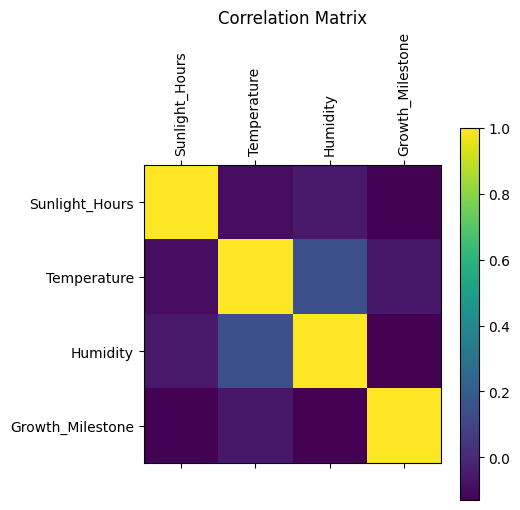

In [7]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [8]:
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [9]:

df.drop_duplicates()
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [10]:
df.dropna(subset=['Water_Frequency', 'Fertilizer_Type'], inplace=True)
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [11]:
columns_to_fill = [ "Temperature","Humidity","Sunlight_Hours"
]
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,25.016270,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [12]:
df.isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [13]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
Numerical Variables:
['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone']


In [14]:
df = pd.get_dummies(df, columns=['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'])
df.isnull().sum()
df.shape
df

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic
0,5.192294,31.719602,61.591861,0,False,True,False,True,False,False,True,False,False
1,4.033133,28.919484,52.422276,1,False,False,True,False,False,True,False,False,True
2,8.892769,23.179059,44.660539,0,False,True,False,True,False,False,False,True,False
3,8.241144,18.465886,46.433227,0,False,True,False,True,False,False,False,True,False
4,8.374043,25.016270,63.625923,0,False,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,5.652000,28.000000,70.200000,0,False,False,True,False,True,False,False,True,False
189,7.528000,30.500000,60.100000,1,True,False,False,False,False,True,True,False,False
190,4.934000,24.500000,61.700000,0,False,True,False,True,False,False,False,True,False
191,8.273000,27.900000,69.500000,1,False,False,True,False,True,False,False,False,True


# Implement Ada-boast

In [15]:
X = df.drop(['Growth_Milestone'], axis=1)
y= df["Growth_Milestone"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (152, 12)
X_test shape: (39, 12)
y_train shape: (152,)
y_test shape: (39,)


In [17]:
# def adaBoost(n_estimators,learning_rate):
#     abc = AdaBoostClassifier(n_estimators=n_estimators,learning_rate=learning_rate, random_state = 42)
#     model = abc.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


best_accuracy = 0
best_n_estimators = None
best_learning_rate = None

def adaBoost(n_estimators=200, learning_rate=0.01):
    global best_accuracy, best_n_estimators, best_learning_rate
    
    abc = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    model = abc.fit(X_train, y_train)
    
  
    y_pred = model.predict(X_test)
    training_accuracy = model.score(X_train, y_train)
    validation_accuracy = model.score(X_test, y_test)
    
    print(f"n_estimators={n_estimators}, learning_rate={learning_rate}")
    print(f"Accuracy score (training): {training_accuracy:.3f}")
    print(f"Accuracy score (validation): {validation_accuracy:.3f}")
    
    if validation_accuracy > best_accuracy:
        best_accuracy = validation_accuracy
        best_n_estimators = n_estimators
        best_learning_rate = learning_rate



In [18]:
n_estimators_list = [10, 50, 100, 200, 500, 1000]
learning_rate_list = [0.01, 0.1, 0.5, 0.9, 0.99]
for i in n_estimators_list:
    for j in learning_rate_list:
        adaBoost(i,j)
print(f"\nBest Accuracy: {best_accuracy:.3f}")
print(f"Best Parameters: n_estimators={best_n_estimators}, learning_rate={best_learning_rate}")

n_estimators=10, learning_rate=0.01
Accuracy score (training): 0.645
Accuracy score (validation): 0.513
n_estimators=10, learning_rate=0.1
Accuracy score (training): 0.651
Accuracy score (validation): 0.538
n_estimators=10, learning_rate=0.5
Accuracy score (training): 0.711
Accuracy score (validation): 0.615
n_estimators=10, learning_rate=0.9
Accuracy score (training): 0.750
Accuracy score (validation): 0.487
n_estimators=10, learning_rate=0.99
Accuracy score (training): 0.717
Accuracy score (validation): 0.513
n_estimators=50, learning_rate=0.01
Accuracy score (training): 0.651
Accuracy score (validation): 0.538
n_estimators=50, learning_rate=0.1
Accuracy score (training): 0.697
Accuracy score (validation): 0.641
n_estimators=50, learning_rate=0.5
Accuracy score (training): 0.783
Accuracy score (validation): 0.487
n_estimators=50, learning_rate=0.9
Accuracy score (training): 0.829
Accuracy score (validation): 0.462
n_estimators=50, learning_rate=0.99
Accuracy score (training): 0.875
A